In [1]:
# importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<img src = "https://assets.fontsinuse.com/static/use-media-items/108/107096/full-1300x600/5e67b80f/CDC-logo.png"></img>

dataset courtesy : https://data.cdc.gov/NCHS/Conditions-contributing-to-deaths-involving-corona/hk9y-quqm

In [3]:
# calling in data
data = pd.read_csv("/home/db/Documents/Datasets/COVID-19.csv")
data.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,04/25/2021,01/01/2020,04/24/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,370.0,384.0,NaN
1,04/25/2021,01/01/2020,04/24/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,1692.0,1731.0,NaN
2,04/25/2021,01/01/2020,04/24/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,4548.0,4664.0,NaN
3,04/25/2021,01/01/2020,04/24/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,13587.0,13964.0,NaN
4,04/25/2021,01/01/2020,04/24/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,34936.0,35852.0,NaN


## Part-1

### Grouping according to condition and pointing out more common problems contributing to covid deaths.

In [4]:
data["Condition Group"].value_counts()

Circulatory diseases                                                         71820
Respiratory diseases                                                         61560
Obesity                                                                      10260
COVID-19                                                                     10260
Sepsis                                                                       10260
Vascular and unspecified dementia                                            10260
Renal failure                                                                10260
Intentional and unintentional injury, poisoning, and other adverse events    10260
All other conditions and causes (residual)                                   10260
Diabetes                                                                     10260
Alzheimer disease                                                            10260
Malignant neoplasms                                                          10260
Name

There are 12 condition groups.

<AxesSubplot:xlabel='Condition'>

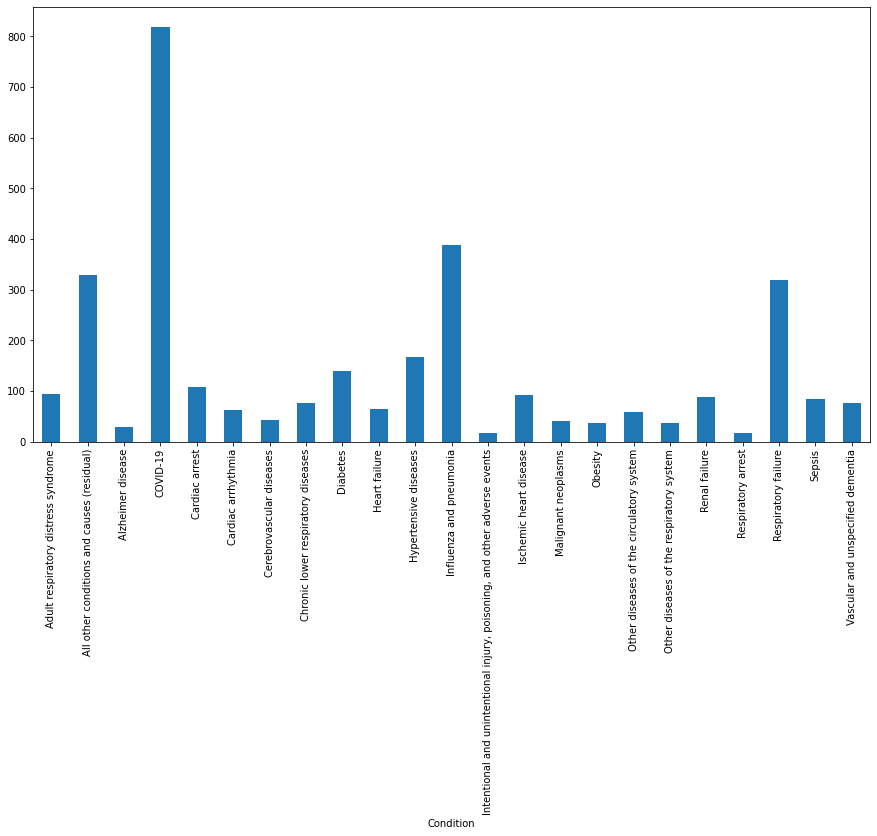

In [5]:
plt.figure(figsize = (15,8))
Condition = data.groupby("Condition").mean()["COVID-19 Deaths"]
Condition.plot(kind = "bar")

We see that apart from covid-19 other conditions such as Influenza , heart problems , Respiratory problems, alsocontribute to covid deaths.

In [6]:
data["Condition"].value_counts()

Cardiac arrhythmia                                                           10260
Intentional and unintentional injury, poisoning, and other adverse events    10260
Alzheimer disease                                                            10260
Ischemic heart disease                                                       10260
Heart failure                                                                10260
Diabetes                                                                     10260
Other diseases of the respiratory system                                     10260
Other diseases of the circulatory system                                     10260
Chronic lower respiratory diseases                                           10260
All other conditions and causes (residual)                                   10260
Adult respiratory distress syndrome                                          10260
Hypertensive diseases                                                        10260
Cere

## Part -2 

Knowing the age group of the conditions and grouping them accordingly.

In [7]:
import seaborn as sns

In [8]:
#making a new dataframe consisting of just the 4 groups which are common "Respiratory diseases","Circulatory diseases","Diabetes","COVID-19"
filter_list = ["Respiratory diseases","Circulatory diseases","Diabetes"]
data1 = data[data["Condition Group"].isin(filter_list)]
# taking only 3 required columns
data1 = data1[["Condition Group","Age Group","COVID-19 Deaths"]]
# removing the category "Not stated" from age group
filterlist2 = ["All Ages","Not stated"]
data1 = data1[np.logical_not(data1["Age Group"].isin(filterlist2))]

In [9]:
data1["Age Group"].value_counts()

65-74    14364
0-24     14364
25-34    14364
75-84    14364
35-44    14364
85+      14364
45-54    14364
55-64    14364
Name: Age Group, dtype: int64

In [10]:
# getting ages from age-group
import random
ages = []
for i in data1["Age Group"]:
    if i == "0-24":
        ages.append(random.randint(0,24))
    elif i=="25-34":
        ages.append(random.randint(25,34))
    elif i=="35-44":
        ages.append(random.randint(35,44))
    elif i=="45-54":
        ages.append(random.randint(45,54))
    elif i=="55-64":
        ages.append(random.randint(55,64))
    elif i=="65-74":
        ages.append(random.randint(64,74))
    elif i=="75-84":
        ages.append(random.randint(75,84))
    else:
        ages.append(random.randint(85,90))

In [11]:
data1["Age"] = ages

In [12]:
data1.head(20)

,Condition Group,Age Group,COVID-19 Deaths,Age
0,Respiratory diseases,0-24,370.0,22
1,Respiratory diseases,25-34,1692.0,34
2,Respiratory diseases,35-44,4548.0,42
3,Respiratory diseases,45-54,13587.0,48
4,Respiratory diseases,55-64,34936.0,61
5,Respiratory diseases,65-74,61359.0,74
6,Respiratory diseases,75-84,71854.0,78
7,Respiratory diseases,85+,66033.0,86
10,Respiratory diseases,0-24,48.0,10
11,Respiratory diseases,25-34,154.0,32


In [13]:
data1.groupby("Condition Group").sum()["COVID-19 Deaths"]

Condition Group
Circulatory diseases    2253061.0
Diabetes                 526012.0
Respiratory diseases    3590279.0
Name: COVID-19 Deaths, dtype: float64

In [14]:
data["COVID-19 Deaths"].sum()

24904207.0

## Quick stats

- 9 percent of people who died by corona had circulatory diseases.

- 2.1 percent of people had diabetes

- 14 percent of people who died by corona had respiratory diseases

In [15]:
# getting this data into R
data1.to_csv("Agegroup1.csv")